Проектная работа разрабатки стратегии взаимодействия с клиентами сети фитнес-центров.
В фитнес индустрии существует проблема оттока клиентов. Наша задача — провести анализ и подготовить план действий по удержанию клиентов. А именно: научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента; сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства; проанализировать основные признаки, наиболее сильно влияющие на отток; сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

выделить целевые группы клиентов;
предложить меры по снижению оттока;
определить другие особенности взаимодействия с клиентами. Данное исследование разделим на несколько частей.

Данное исследование разделим на несколько частей.

<a id='20-bullet'></a>
#### [Часть 1. Изучение общей информаци](#1-bullet)
* [ Изученеие файлов с данными, получение общей информации, загрузка библиотек](#1-bullet)


#### [Часть 2. Исследовательский анализ данных (EDA)](#2-bullet)
* [Изучение среднего значения и стандартного отклонения признаков и посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался](#2-bullet)
* [Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#3-bullet)
* [Построение матрицы корреляций](#4-bullet)


#### [Часть 3. Построение модели прогнозирования оттока клиентов](#5-bullet)

#### [Часть 4. Кластеризация клиентов](#6-bullet)



## [ Общий вывод](#7-bullet) 

## Часть 1. Изучение общей информаци

<a id='1-bullet'></a>

#### - Изученеие файлов с данными, получение общей информации, загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans

In [2]:
gym_churn = pd.read_csv("gym_churn.csv")

In [3]:
def general_information(data):
    data.info()
    print()
    print('Размер')
    display(data.shape)
    print()
    display(data.head())
    print()
    print('Дубликатов')
    display(data.duplicated().sum())

In [4]:
general_information(gym_churn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB

Размер


(4000, 14)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



Дубликатов


0

#### Вывод:
- Имеется таблица с данными: "gym_churn" - таблица, размером в 4000 строк, в которой содержатся данные сети фитнес-центров «Культурист-датасаентист»  на месяц до оттока и факт оттока на определённый месяц со следующими параметрами в каждой строке: 'Churn' — факт оттока в текущем месяце, Данные клиента за предыдущий до проверки факта оттока месяц:'gender' — пол,'Near_Location' — проживание или работа в районе, где находится фитнес-центр, 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента), Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента),'Phone' — наличие контактного телефона, 'Age' — возраст,'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах); а также информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента: 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год), 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах), 'Group_visits' — факт посещения групповых занятий,'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента, 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц, 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.
- Первый взгляд на таблицу:типы данных соответствуют типам данных представленных в столбцах, пропусков и дубликатов не обнаружено.

<a id='2-bullet'></a>

## Часть 2. Исследовательский анализ данных (EDA)

Сначала ответим на вопросы, на которые полезно ответить на этом этапе оценки качества данных:
- Какой размер датасета? Мы уже омечали, что у нас 4000 наблюдений, этого достаточно
- Какие в него входят признаки? У нас есть и числовые и категориальные, в которые входят также и бинарные признаки. Для не бинарных признаков изучим средние значения и стандартные отклонения, посмотрим на распределения и взаимные корреляции для выявления аномалий для категориальныех признаков и числовых. 
- Какова доля пропущенных значений? Также уже выше было отмечено, что пропусков в данном датасете нет.

<a id='2-bullet'></a>

#### - Изучение среднего значения и стандартного отклонения признаков и посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

Сначала сделала только для не бинарных признаков, но т.к. два пункта решила сделать в одном, поэтому будет в таком виде и вывод будет с учетом принадлежности к бинарным или не бинарным признакам.

'Пол'

count    4000.000000
mean        0.510250
std         0.499957
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

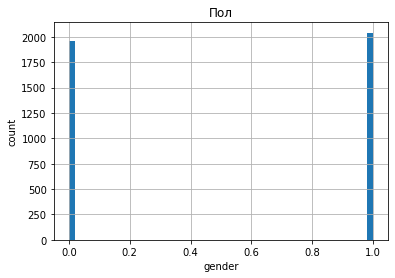

Нет оттока в текущем месяце


,Churn,gender
,,mean
0,0,0.510037



Отток в текущем месяце


,Churn,gender
,,mean
0,1,0.510839


'Близкое расположение'

count    4000.000000
mean        0.845250
std         0.361711
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Near_Location, dtype: float64

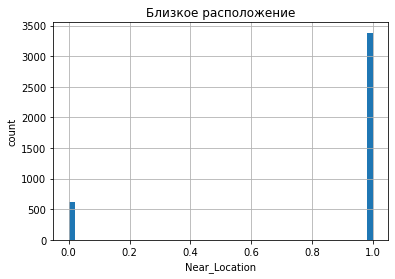

Нет оттока в текущем месяце


,Churn,Near_Location
,,mean
0,0,0.873086



Отток в текущем месяце


,Churn,Near_Location
,,mean
0,1,0.768143


'Сотрудник компании-партнёра'

count    4000.000000
mean        0.486750
std         0.499887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Partner, dtype: float64

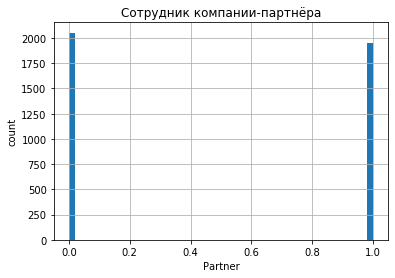

Нет оттока в текущем месяце


,Churn,Partner
,,mean
0,0,0.534195



Отток в текущем месяце


,Churn,Partner
,,mean
0,1,0.355325


'Пришел по промо-коду'

count    4000.000000
mean        0.308500
std         0.461932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Promo_friends, dtype: float64

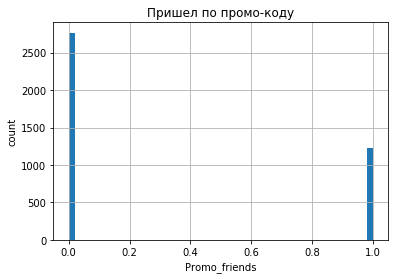

Нет оттока в текущем месяце


,Churn,Promo_friends
,,mean
0,0,0.353522



Отток в текущем месяце


,Churn,Promo_friends
,,mean
0,1,0.183789


'Наличие номера телефона'

count    4000.000000
mean        0.903500
std         0.295313
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Phone, dtype: float64

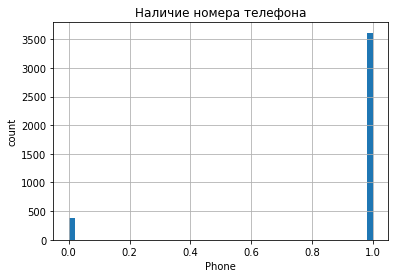

Нет оттока в текущем месяце


,Churn,Phone
,,mean
0,0,0.903709



Отток в текущем месяце


,Churn,Phone
,,mean
0,1,0.902922


'Длительность текущего абонемента'

count    4000.000000
mean        4.681250
std         4.549706
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: Contract_period, dtype: float64

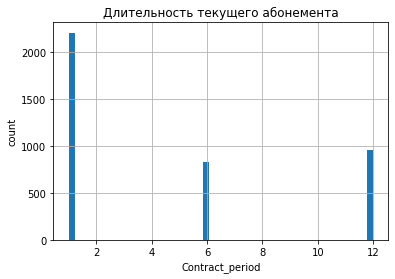

Нет оттока в текущем месяце


,Churn,Contract_period
,,mean
0,0,5.747193



Отток в текущем месяце


,Churn,Contract_period
,,mean
0,1,1.728558


'Посещает груповые занятия'

count    4000.000000
mean        0.412250
std         0.492301
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Group_visits, dtype: float64

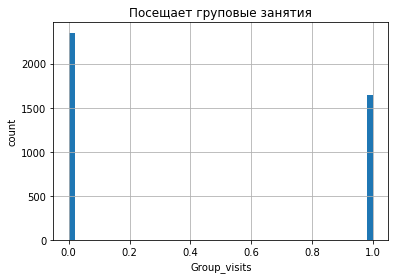

Нет оттока в текущем месяце


,Churn,Group_visits
,,mean
0,0,0.464103



Отток в текущем месяце


,Churn,Group_visits
,,mean
0,1,0.268615


'Возраст'

count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: Age, dtype: float64

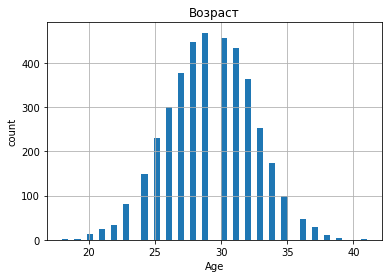

Нет оттока в текущем месяце


,Churn,Age
,,mean
0,0,29.976523



Отток в текущем месяце


,Churn,Age
,,mean
0,1,26.989632


'Суммарная выручка от других услуг'

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: Avg_additional_charges_total, dtype: float64

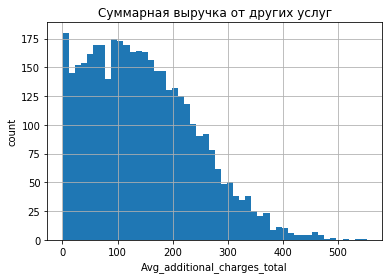

Нет оттока в текущем месяце


,Churn,Avg_additional_charges_total
,,mean
0,0,158.445715



Отток в текущем месяце


,Churn,Avg_additional_charges_total
,,mean
0,1,115.082899


'Месяцев до окончания абонемента'

count    4000.000000
mean        4.322750
std         4.191297
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: Month_to_end_contract, dtype: float64

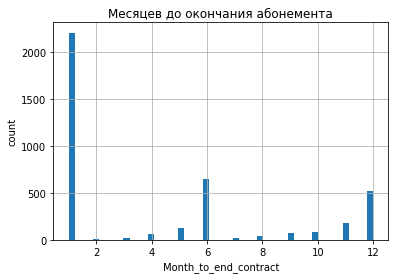

Нет оттока в текущем месяце


,Churn,Month_to_end_contract
,,mean
0,0,5.283089



Отток в текущем месяце


,Churn,Month_to_end_contract
,,mean
0,1,1.662582


'Месяцы прошедшие с первого посещения'

count    4000.000000
mean        3.724750
std         3.749267
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        31.000000
Name: Lifetime, dtype: float64

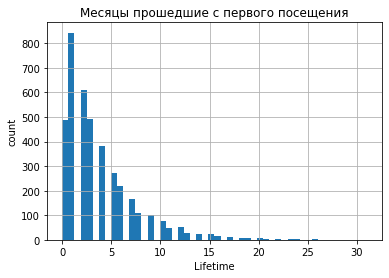

Нет оттока в текущем месяце


,Churn,Lifetime
,,mean
0,0,4.711807



Отток в текущем месяце


,Churn,Lifetime
,,mean
0,1,0.990575


'Средняя частота посещений за все время'

count    4000.000000
mean        1.879020
std         0.972245
min         0.000000
25%         1.180875
50%         1.832768
75%         2.536078
max         6.023668
Name: Avg_class_frequency_total, dtype: float64

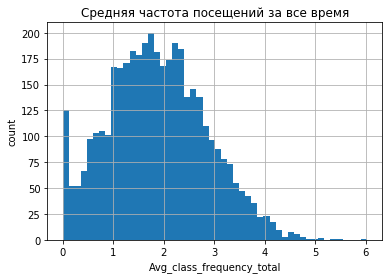

Нет оттока в текущем месяце


,Churn,Avg_class_frequency_total
,,mean
0,0,2.024876



Отток в текущем месяце


,Churn,Avg_class_frequency_total
,,mean
0,1,1.474995


'Средняя частота посещений за предыдущий месяц'

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: Avg_class_frequency_current_month, dtype: float64

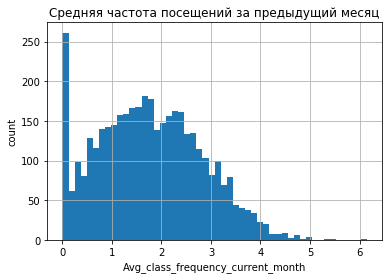

Нет оттока в текущем месяце


,Churn,Avg_class_frequency_current_month
,,mean
0,0,2.027882



Отток в текущем месяце


,Churn,Avg_class_frequency_current_month
,,mean
0,1,1.044546


In [5]:
# Не для бинарных признаков
dict_for_auto_1 = {
    'gender':['Пол'],
    'Near_Location':['Близкое расположение'],
    'Partner':['Сотрудник компании-партнёра'], 
    'Promo_friends':['Пришел по промо-коду'],
    'Phone':['Наличие номера телефона'],
    'Contract_period':['Длительность текущего абонемента'],
    'Group_visits':['Посещает груповые занятия'],
    'Age':['Возраст'],
    'Avg_additional_charges_total':['Суммарная выручка от других услуг'],
    'Month_to_end_contract':['Месяцев до окончания абонемента'],
    'Lifetime':['Месяцы прошедшие с первого посещения'],
    'Avg_class_frequency_total':['Средняя частота посещений за все время'],
    'Avg_class_frequency_current_month':['Средняя частота посещений за предыдущий месяц']
}
 
for column in dict_for_auto_1:
    print()
    display(dict_for_auto_1[column][0])
    display(gym_churn[column].describe())
    display(gym_churn[column].hist(bins=50))
    plt.title(dict_for_auto_1[column][0])
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()
    print('Нет оттока в текущем месяце')
    stat_1 = gym_churn.query('Churn !=1').groupby('Churn').agg({column:['mean']}).reset_index()
    display(stat_1)
    print()
    print('Отток в текущем месяце')
    stat_2 = gym_churn.query('Churn !=0').groupby('Churn').agg({column:['mean']}).reset_index()
    display(stat_2)

'Age'

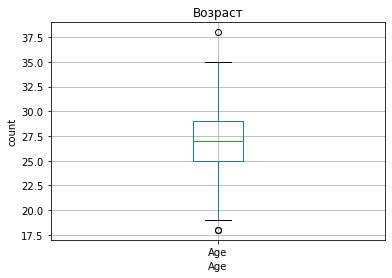

'Avg_additional_charges_total'

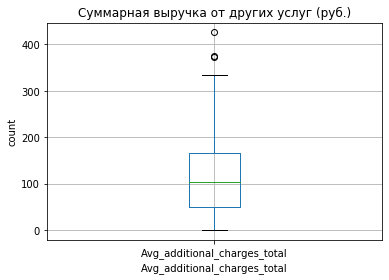

'Month_to_end_contract'

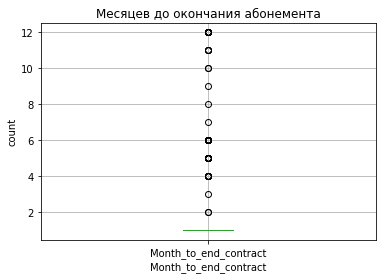

'Lifetime'

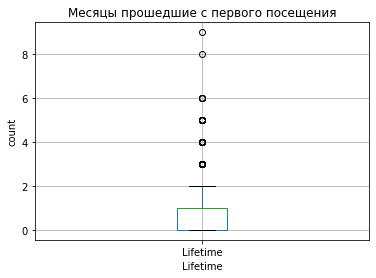

'Avg_class_frequency_total'

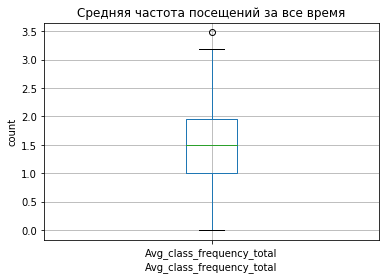

'Avg_class_frequency_current_month'

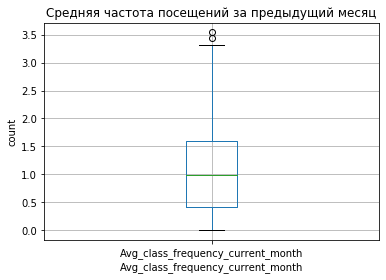

In [6]:
# Не для бинарных признаков
dict_for_auto_1 = {
    'Age':['Возраст'],
    'Avg_additional_charges_total':['Суммарная выручка от других услуг (руб.)'],
    'Month_to_end_contract':['Месяцев до окончания абонемента'],
    'Lifetime':['Месяцы прошедшие с первого посещения'],
    'Avg_class_frequency_total':['Средняя частота посещений за все время'],
    'Avg_class_frequency_current_month':['Средняя частота посещений за предыдущий месяц']
}
 
for column in dict_for_auto_1.keys():
    display(column)
    gym_churn.query('Churn !=0').boxplot(column)
    plt.title(dict_for_auto_1[column][0])
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()          

#### Вывод:
- Пол: почти одинаковое количество мужчин и женщин, несильно большая разница, одинаковое количество и по оттоку
- Клиентов у которых дом или работа находятся недалеко от клубов сети большинство, реже уходят в отток.
- Сотрудников и не сотрудников компаний - партнеров поровну, зато сотрудники не уходят.
- Без промо-кода пришло в два раза меньше, чем с промо-кодом, но с промо-кодом надежнее клиенты.
- Большее количество клиентов не посещают групповые занятия, но при этом среди посещающих группы больше клиентов,которые не попадают в отток.
- Около 10% клиентов не оставили свой номер телефона, от того количества которое оставило, на отток никак не влияет этот факт.
- Длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год). Не вижу трех месяцев, не пользуются спросом или их не продают? Много месячных абонементов, таких больше, чем  в два раза годовых и еще большая разница с полугодовалыми абонементами. В отток уходят с "короткими" абонементами, удерживаются с более длительными, в среднем это 6 месяцев.
- Для средней частоты посещений в неделю за предыдущий месяц, средняя равна медиане и равно 1.7 раза, распределение, если бы не большое количество нулевых посещений, почти нормальное, стандартное отклонение равно 1, т.е. разброс небольшой. Есть выбросы, например посещений более пяти в неделю, но они не повлияли на статистику, также как и нулевые значения Для посетителей, которые не попали в отток в текущем месяце среднее количество равно 2, а попавших - 1(чем реже занимаешься, тем больше вероятности попасть в отток).
-  Средняя частота посещений в неделю за все время с начала действия абонемента, средняя равна медиане и равно 1.8 раза. Также как и предыдущем пункте, и распределение почти нормальное, если бы не нулевые значения, и стандартное отклонение тоже равно 1. Есть выбросы (больше 5 посещений). Среднее количество посещений за весь период равно тоже 2 и 1.4 у тех кто не попал в отток и кто попал, соответственно. 
- По категории возраст (моё любимое))) - тут опять совпадение значений среднего и медианного 29 лет, распределение ближе к нормальному, стандартное отклонение равно 3, разброс небольшой (странно это конечно). Также странно, что максимальное значение всего 41, Всемирная Организация Здравоохранения делит людей на следующие группы и категории: 18-44 лет - молодость, 44-60 лет - средний возраст,60-75 лет - пожилой человек и т.д. И в этом клубе самый взрослый в возрасте 41 года) Видимо какой то специфический клуб, где есть ограничения) Для любителей спорта не в оттоке средний возраст 29, в оттоке - 26. Помоложе менее дисциплинированные, а если б они пустили в клуб "тетенек" за 40, то они сразу б подняли статистику по посещаемости) и оттока б было меньше (это все из личного опыта))
- Суммарная выручка от других услуг фитнес-центра, здесь среднее и медианное значения почти равны: 146 руб. среднее, что на 10 руб больше чем медианное, стандартное отклонение равно 96, разброс большой, распределение смещено влево, если и покупают доп услуги, то чаще не на большую сумму, пиковое на нуле, следующий пик на 100 руб. Резкий спад примерно от 200 руб. Те что не уходят в отток, тратят больше денег на доп услуги, чем те что в оттоке, т.е. 158 руб в среднем, что больше чем на 40 руб больше. Разница в рублях как-будто невелика, но если в процентном отношении, до достаточно большая (25%).
- Срок до окончания текущего действующего абонемента (в месяцах). У большого количества абонемент заканчивается через месяц, поэтому медиана равна этому значению, возможно абонементы на месяц пользуются большим спросом, поэтому такие значения мы и видим (эту гипотезу сможем подтвердить или опровергнуть чуть позже). Стандартное отклонение равно 4, т.к. это категориальное значение (т.е. ограничено некими значениями), то оценивать нет смысла, это параметр, наверное. Клиенты, которые не попали в отток могут посещать клуб еще в среднем 5 месяцев, а вот кто в оттоке, то у них уже в среднем через 1.5 месяца абонемент заканчивается. Т.е. они несильно и переживают, т.к. не очень то много и потеряют (и в денежном и в спортивном смысле), если больше не вернутся)
- Время с момента первого обращения в фитнес-центр (в месяцах), опять среднее и медианное зн-ия почти равны: 3 и  месяца 3,7 , стандартное отклонение = 3,7, очень много новеньких клиентов, а вот стареньких не так и много, а если принять, что максимум это 31 месяц и таких ничтожно мало (единицы), то смею предположить, что клуб во-первых молодой (около трех лет), во-вторых плохо удерживает клиентов, ну конечно, это мое мнение, но оно основано на собственном опыте. Но можно сделать поправку, а именно, что средний возраст до 30, и вполне возможно, что именно этот факт влияет на показатель длительности посещения одного спортивного зала, т.е. я хочу сказать, что постоянство не присуще молодости). И вполне закономерно, что попадают в отток новички, которые в среднем отходили месяц, а вот если продержался пять месяцев, то вполне возможно, что такие клиенты останутся еще на 30 месяцев)))

[Наверх](#20-bullet)

<a id='3-bullet'></a>

#### - Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

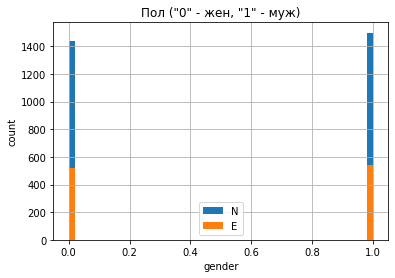

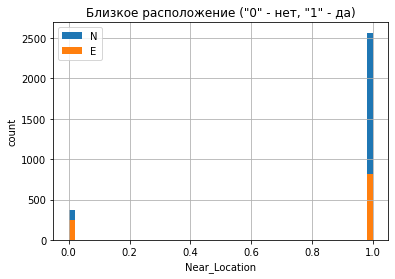

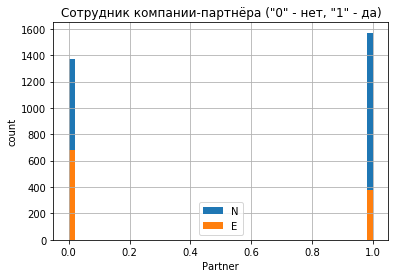

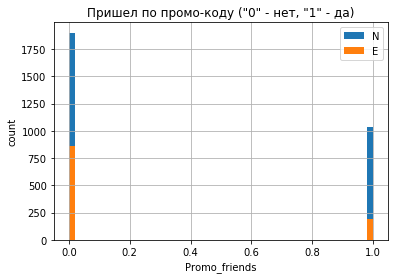

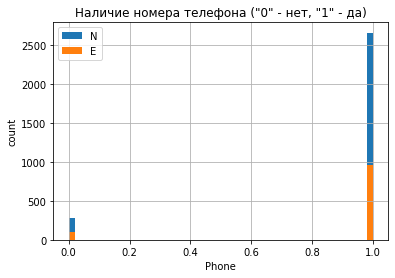

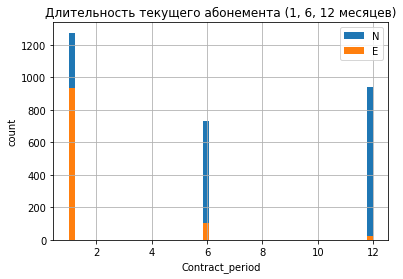

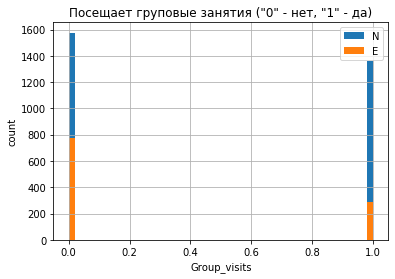

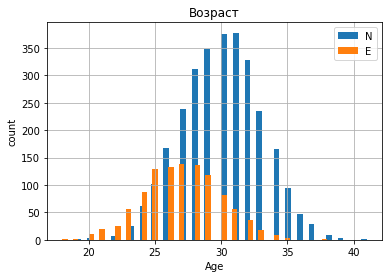

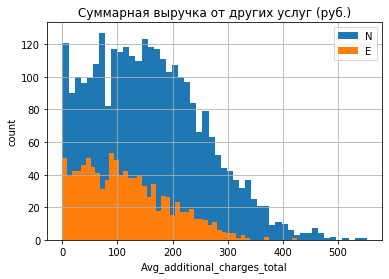

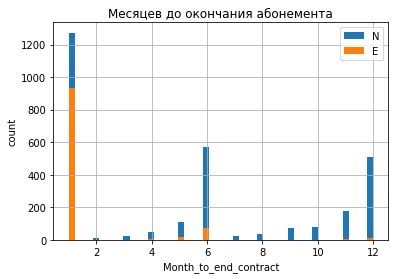

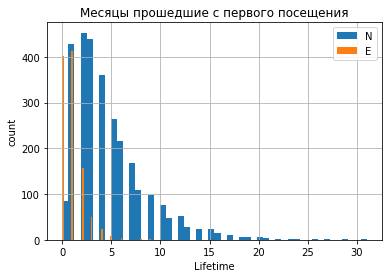

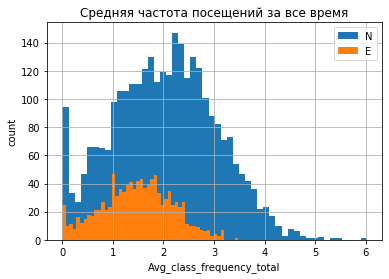

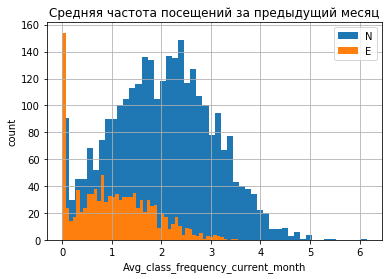

In [7]:
dict_for_auto_2 = {
    'gender':['Пол ("0" - жен, "1" - муж)'],
    'Near_Location':['Близкое расположение ("0" - нет, "1" - да)'],
    'Partner':['Сотрудник компании-партнёра ("0" - нет, "1" - да)'], 
    'Promo_friends':['Пришел по промо-коду ("0" - нет, "1" - да)'],
    'Phone':['Наличие номера телефона ("0" - нет, "1" - да)'],
    'Contract_period':['Длительность текущего абонемента (1, 6, 12 месяцев)'],
    'Group_visits':['Посещает груповые занятия ("0" - нет, "1" - да)'],
    'Age':['Возраст'],
    'Avg_additional_charges_total':['Суммарная выручка от других услуг (руб.)'],
    'Month_to_end_contract':['Месяцев до окончания абонемента'],
    'Lifetime':['Месяцы прошедшие с первого посещения'],
    'Avg_class_frequency_total':['Средняя частота посещений за все время'],
    'Avg_class_frequency_current_month':['Средняя частота посещений за предыдущий месяц']
}
 
for column in dict_for_auto_2.keys():
    print()
    gym_churn.query('Churn !=1')[column].hist(bins = 50)
    gym_churn.query('Churn !=0')[column].hist(bins = 50)
    plt.title(dict_for_auto_2[column][0])
    plt.legend('NE')
    plt.xlabel(column)
    plt.ylabel('count')
    plt.show()          

Text(0, 0.5, 'count')

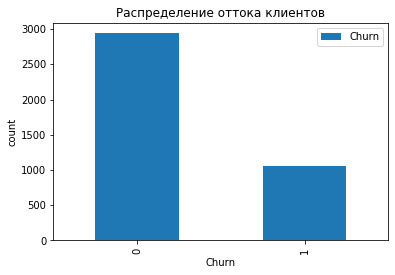

In [8]:
gym_churn['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока клиентов')
plt.xlabel('Churn')
plt.ylabel('count')

Четверть клиентов попало в отток

#### Вывод:
- Выбрала, "Ж" - 0, и "М" соответственно - 1, т.к. это логично, женщина же это никто, просто ноль) но я так не думаю, конечно) Также посмотрела на количество занимающихся в группах, т.е. на групповые  в наших данных ходит меньшее количество, и т.к. групповые больше любят женщины (опять из личного опыта) и значит посещают их больше, значит признаки пол и посещение групповых должно коррелироваться, то логично, что меньшее количество в наших данных должно быть именно женщинами. Сумбурно, наверное получилось. Но сейчас не принципиально, кто М, а кто Ж, поэтому оставлю так как я решила) Женщин посещающих и не в оттоке чуть больше 1400, мужчин около 1500. В оттоке "Ж" ~ 500, "М" чуточку больше, пропорции почти одинаковые.
- Близкое расположение очень влияет на выбор клуба, поэтому разница большая в относительных единицах, т.е. те кто близко живет или работает, реже попадают в отток.
- Также и с сотрудниками партнеров, такие реже уходят, только четвертая часть, а не участвующие в партнерских акциях в половине случаях попадают в отток.
- Пришедших по промо-коду значительно меньше, чем без него, но зато они удерживаются лучше, менее 25 %, а вот без - почти половина в оттоке от тех кто не в оттоке.
- Наличие или отсутствие телефона клиента в базе не влияет на отток.
- И конечно, длительность абонемента на прямую влияет на то, попадет он в отток или нет: чем на большее количество месяцев куплен абонемент, тем меньше вероятности попасть в отток, точнее при значении в 12 месяцев она стремится к нулю.
- Посещающие групповые занятия более дисциплинированы, и к тому же это чаще женщины, а они более мотивированы, поэтому такие клиенты реже бросают посещать клуб не использовав абонемент.
- Про остальные признаки было написано ранее, обобщу: более взрослые скорей не попадут в отток, чем попадут, также как и те, у которых еще много месяцев проплачено, "старые" клиенты и чаще посещающие клуб, а соответственно больше любящие спорт реже становятся "неблагонадежными" клиентами. Таких надо холить и лелеять) Но стоит подумать как удержать тех, кто покупает короткие абонементы, т.е. уболтать их купить на более длительный срок абонемент и заставить полюбить Зумбу) и поменять пол на женский) и т.д.и т.п.
- Соотношение клиентов попавших в отток к не попавшим 1 к 3.

[Наверх](#20-bullet)

<a id='4-bullet'></a>

#### - Построение матрицы корреляций

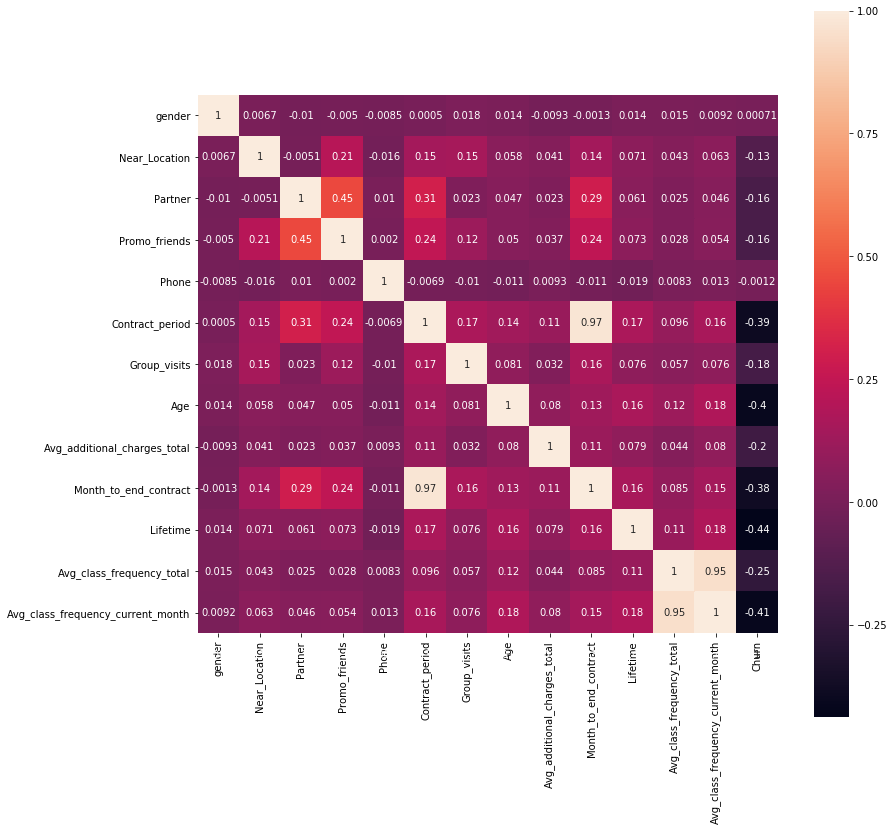

In [9]:
#  построим и отрисуем матрицу корреляций
cm = gym_churn.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(13, 13))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, square=True) 
ax.set_ylim(13, 0) # корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

#### - Вывод
На этом этапе уже можем посмотреть:
- какие признаки наиболее сильно коррелируют с целевой переменной ('Churn'), в нашем случае - никакие, но если учесть кто сильнее всего, то это время с момента первого обращения в фитнес-центр;
- какие признаки сильно коррелируют между собой. Это среднее количество посещений за последний месяц и за весь период, а также  длительность текущего действующего абонемента и количество месяцев до окончания абонемента. Таки признаки можно удалить, т.е. один из пары коррелирующих признаков. Но, мы применим к выборкам соответствующий метод позже.
- ошиблась с предположением, что пол влияет на посещение групповых занятий, но это очень странно, хотя м.б. это гламурный московский клуб, куда ходят нетипичные для периферии мужчины, любящие приседать перед большими зеркалами и под музыку?) У нас, не в городе миллионике, мужчины почти не ходят в зал для групповых занятий, т.е. крайне редко там появляются и бессистемно. 

<a id='5-bullet'></a> 

[Наверх](#20-bullet)

##  Часть 3. Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

#### - Разобъем данные на обучающую и валидационную выборку

In [10]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop('Churn', axis = 1)
y = gym_churn['Churn']

In [11]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

In [12]:
# выведите среднее и стандартное отклонение признака 'Page total likes'
print('Mean for train', np.mean(X_train['Avg_additional_charges_total']))
print('Std for train', np.std(X_train['Avg_additional_charges_total']))

Mean for train 145.66436019381206
Std for train 96.73102311047082


#### - Cтандартизируем данные

In [13]:
 
scaler = StandardScaler()

In [14]:
scaler.fit(X_train)  # обучим scaler на обучающей выборке методом fit

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train_st = scaler.transform(X_train)  # стандартизируем обучающую выборку методом transform scaler 
X_test_st = scaler.transform(X_test)  # стандартизируем тестовую выборку методом transform scaler

Можно было бы применить модель линейной регрессии со встроенной L1-регуляризацией весов (ограничение на сумму модулей весов), т.к. у нас есть две пары сильно коррелирующих между собой - можно было зададать алгоритм для нашей модели model = Lasso(), но мы этого делать не будем, т.к. в задании указан алгоритм для решения таких задач — логистическая регрессия, где регуляризация применяется по умолчанию 

#### - Обучим модель на train-выборке двумя способами:  логистической регрессией и случайным лесом.

Логистическая регрессия

In [16]:
# задайте алгоритм для нашей модели
lr_model = LogisticRegression(random_state = 0, solver='lbfgs')

In [17]:
# обучим модель на стандартизированной обучающей выборке
lr_model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы стандартизированной валидационной выборки
lr_predictions = lr_model.predict(X_test_st) 
# Сделаем оценку вероятности принадлежности ко второму классу (среди классов "0" и "1", имеем в виду класс "1"), т.е. уйти в отток 
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [19]:
# Посмотрим на прогнозы и на оценки вероятности
print(lr_predictions)
print(lr_probabilities)

[1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 1 0 

#### - Oбучим модель случайного леса

In [20]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# n_estimators — число деревьев, на основании которых будем строить лес. 
# При этом другие параметры дерева — например, глубину дерева max_depth,
# размер подвыборки признаков max_features, 
# минимальное количество объектов в узле min_samples_leaf — мы не задавали и оставили их по умолчанию.

In [21]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

#### - Оценим качество для обеих моделей на валидационной выборке.

Оценивать качество моделей будем с помощью следующих метрик:
- Матрица ошибок (англ. confusion matrix)
- Доля правильных ответов (англ. accuracy)
- Точность (англ. precision) и полнота (англ. recall)

In [23]:
# функция, которая будет выводить метрики
def print_all_metrics(y_true, y_pred, prob, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [24]:
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities, title = 'Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85


In [25]:
# выведем все метрики
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


#### Вывод:
- Построили модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце, т.е. сначала разбили данные на обучающую и валидационную выборку, стандартизировали и обучили модель на train-выборке двумя способами:  логистической регрессией и случайным лесом. 
- Оценили качество для обеих моделей на валидационной выборке метриками accuracy, precision и recall: алгоритм логическая регрессия модели в метриках выглядит чуть выигрышнее, чем случайный лес, но обе модели показали очень хороший результат.

<a id='6-bullet'></a>

[Наверх](#20-bullet)

## Часть 4. Кластеризация клиентов

#### - Стандартизируем данные

Стандартизируем данные, исключив целевую переменную

In [26]:
sc = StandardScaler() # создаём объект класса scaler (нормализатор)
X_sc = scaler.fit_transform(gym_churn.drop('Churn', axis = 1)) # обучаем нормализатор и преобразуем набор данных 

In [27]:
print(X_sc[:10]) 

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.79287273 -0.19332863  0.76580519
   0.82634551]
 [ 0.97970588  0.42788074

#### - Построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму.

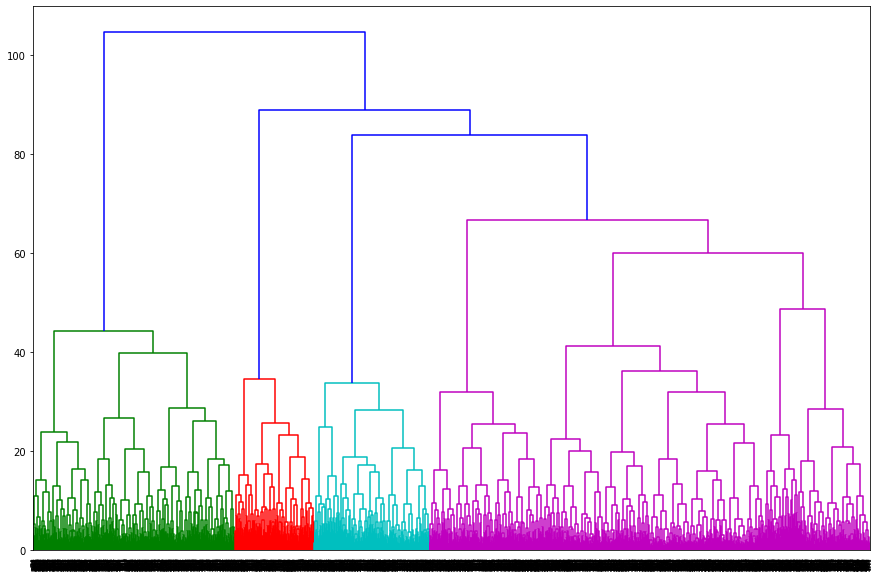

In [28]:
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
# labelList = range(1, 11)
dendrogram(linked, orientation='top')
plt.show() 

#### - Обучим модель кластеризации на основании алгоритма K-Means

Можно предложить число кластеров 4 — четыре разных цветов на графике или пять, выбрав порог расстояний между кластерами около 65.

In [29]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

In [30]:
# сохраняем метки кластера в поле датасета
gym_churn['cluster'] = labels

In [31]:
gym_churn.groupby('cluster')['Churn'].count().reset_index()

,cluster,Churn
0,0,1011
1,1,385
2,2,505
3,3,1262
4,4,837


Разделив на кластеры мы видим, количество клиентов не одинаковое.

#### - Посмотрим на средние значения признаков для кластеров. 

In [32]:
gym_churn.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0,4
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0,1
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1,3
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0,3
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0,4


In [33]:
# выводим статистику по средним значениям признаков по кластеру
gym_churn_group = gym_churn.groupby(['cluster']).mean().reset_index()

In [34]:
gym_churn_group

,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Визуализируем, чтоб нагляднее было

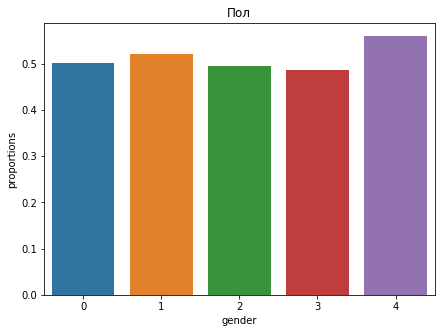

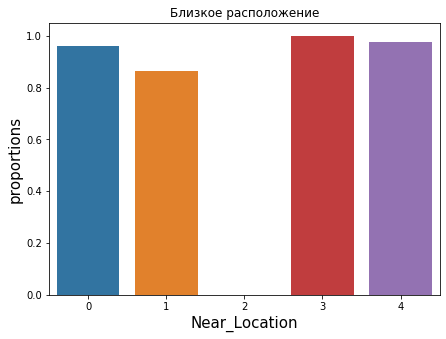

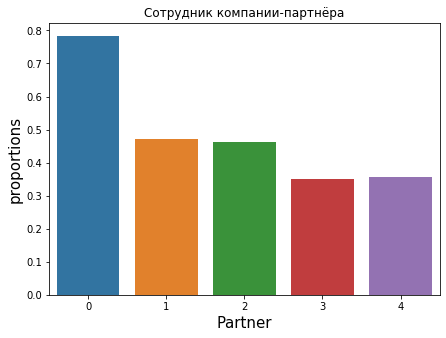

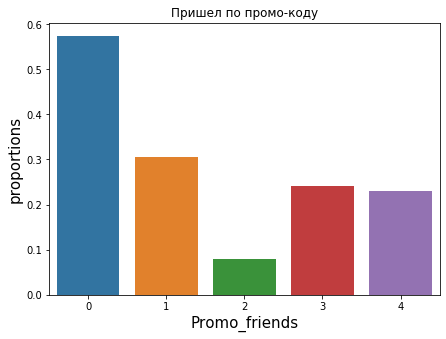

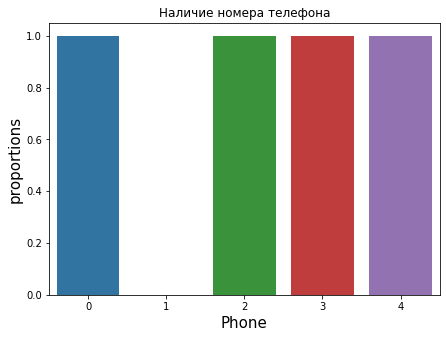

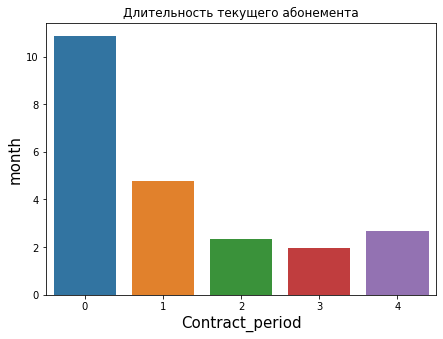

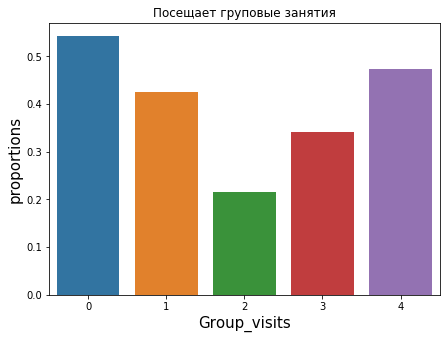

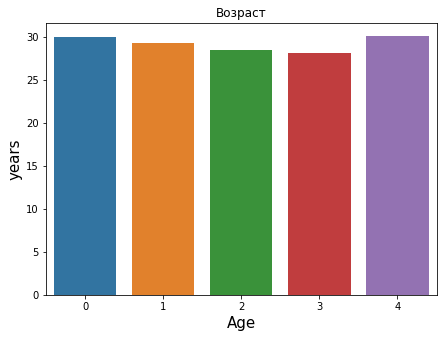

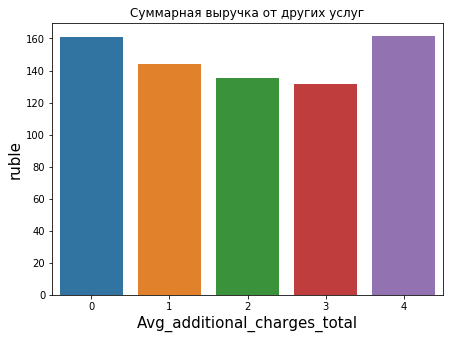

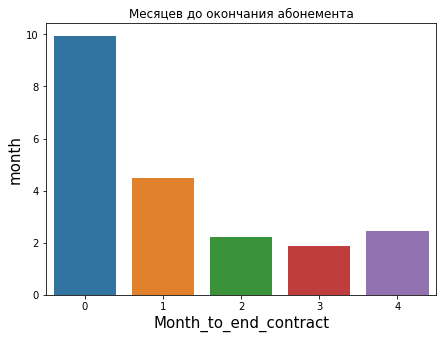

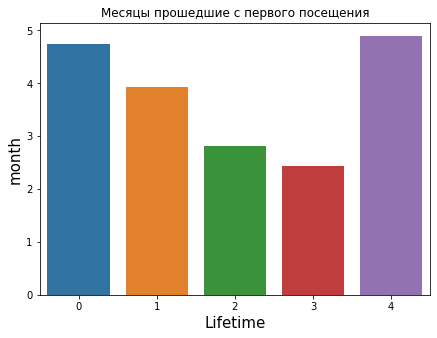

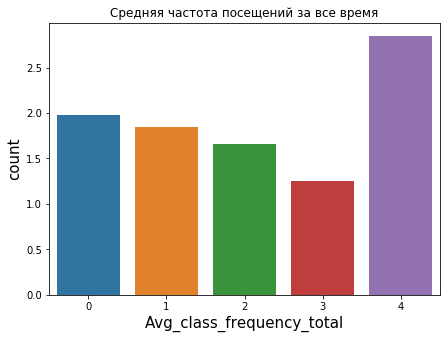

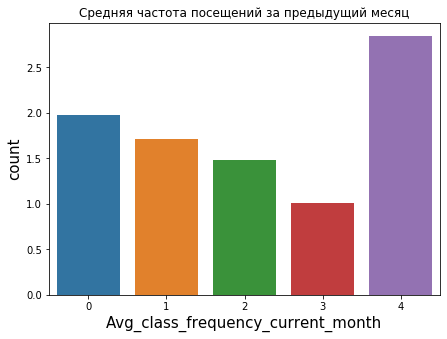

In [35]:
dict_for_auto_4 = {
    'gender':['Пол', 'proportions'],
    'Near_Location':['Близкое расположение', 'proportions'],
    'Partner':['Сотрудник компании-партнёра', 'proportions'], 
    'Promo_friends':['Пришел по промо-коду', 'proportions'],
    'Phone':['Наличие номера телефона', 'proportions'],
    'Contract_period':['Длительность текущего абонемента', 'month'],
    'Group_visits':['Посещает груповые занятия', 'proportions'],
    'Age':['Возраст', 'years'],
    'Avg_additional_charges_total':['Суммарная выручка от других услуг', 'ruble'],
    'Month_to_end_contract':['Месяцев до окончания абонемента', 'month'],
    'Lifetime':['Месяцы прошедшие с первого посещения', 'month'],
    'Avg_class_frequency_total':['Средняя частота посещений за все время', 'count'],
    'Avg_class_frequency_current_month':['Средняя частота посещений за предыдущий месяц', 'count']
}
for column in dict_for_auto_4.keys():
    print()
    ig, ax = plt.subplots(figsize = (7,5))
    plt.rcParams["axes.labelsize"] = 15  # размер шрифта подрписи осей
    sns.barplot(data=gym_churn_group, x = 'cluster', y = column)
    plt.title(dict_for_auto_4[column][0])
    plt.xlabel(column)
    plt.ylabel(dict_for_auto_4[column][1])
    plt.show()

Рассматривая график соотношения разбиения на кластеры по каждому признаку мы видим, что:
- по половому признаку раделение почти равное, т.е. "М" и "Ж" почти одинаковое кол-во в каждом кластере и эти пропорции между кластерами почти равны;
- близкое расположение: во втором кластере нет ни одного значения равному 1, зато в остальных разбиение почти одинаковое;
- комапани-партнеры: выбивается 0 кластер, в котором партнеров почти в два раза больше чем в среднем по всем остальным;
- промо-код: выбивается 2 кластер, где очень мало клиентов с помо-кодом и 0, где таковых много;
- наличие номера тлф: в первый кластер попали все без тлф, в остальных 100 % клиентов с ним;
- длительность текущего абонемента: 2, 3, 4 - примерно по 2 месяца, в 1 в два раза больше и в 0 клиенты "длинными" абонементами (10 месяце);
- посещение гупповых занятий: ступенчатое распределение по кластерам от 20% до 50 %, min - 2, max- 0;
- возраст: везде одинаковое примерно 30 лет.
- выручка от доп.услуг : больших разниц между кластерами не наблюдается;
- месяцев до окончания абонемента: такая же картина как и в длительность текущего абонемента (логично, они очень коррелируются между собой);
- длительность "жизни" клиента в клубе: ступенчатое распределение по кластерам от 2 месяцев в среденм до 5;
- средня частота за все время и за предидущий месяц: 4 кластер выделяется, там в среднем около 3 раз в неделю, в остальных меньше.
- Из всего выше сказанного, следует, что во всех наших кластерах возраст, пол и выручка от доп услуг имеют одинаковые значения, в остальных признаках значения более изменчивы.

#### - Построим распределения признаков для кластеров.

In [36]:
dict_for_auto_5 = {
    'gender':['Пол ("0" - жен, "1" - муж)'],
    'Near_Location':['Близкое расположение ("0" - нет, "1" - да)'],
    'Partner':['Сотрудник компании-партнёра ("0" - нет, "1" - да)'], 
    'Promo_friends':['Пришел по промо-коду ("0" - нет, "1" - да)'],
    'Phone':['Наличие номера телефона ("0" - нет, "1" - да)'],
    'Contract_period':['Длительность текущего абонемента (1, 6, 12 месяцев)'],
    'Group_visits':['Посещает груповые занятия ("0" - нет, "1" - да)'],
    'Age':['Возраст'],
    'Avg_additional_charges_total':['Суммарная выручка от других услуг (руб.)'],
    'Month_to_end_contract':['Месяцев до окончания абонемента'],
    'Lifetime':['Месяцы прошедшие с первого посещения'],
    'Avg_class_frequency_total':['Средняя частота посещений за все время'],
    'Avg_class_frequency_current_month':['Средняя частота посещений за предыдущий месяц']
}
def cluster(number): 
    gym_churn_1 = gym_churn[gym_churn['cluster'] == number]
    print('cluster', number)
    for column in dict_for_auto_5.keys():
        print()   
        gym_churn_1.query('Churn !=1')[column].hist(bins = 50)
        gym_churn_1.query('Churn !=0')[column].hist(bins = 50)
        plt.title(dict_for_auto_5[column][0])
        plt.legend('NE')
        plt.xlabel(column)
        plt.ylabel('count')
        plt.show()          

cluster 0



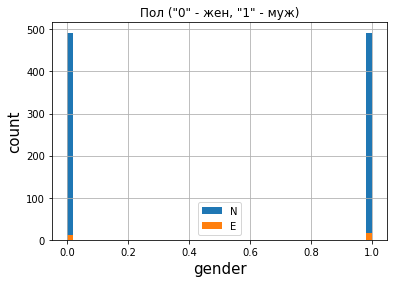

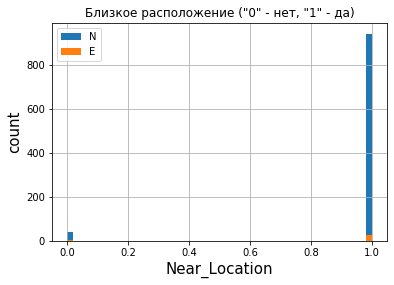

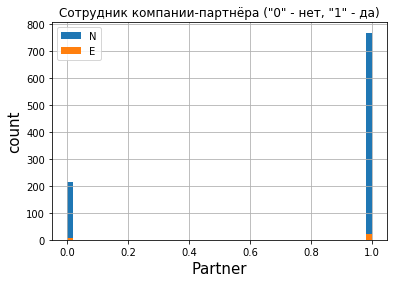

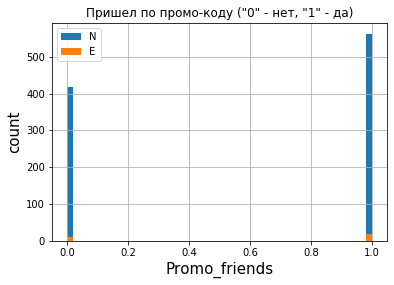

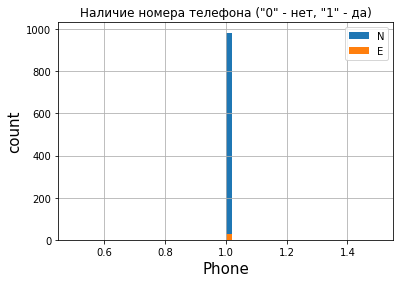

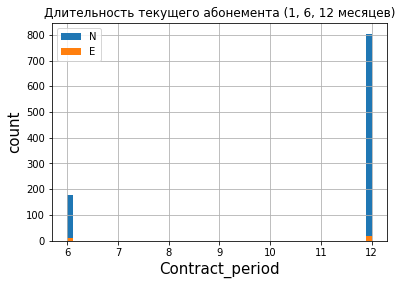

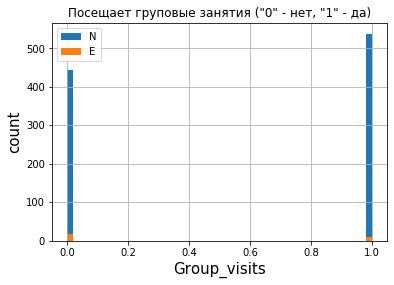

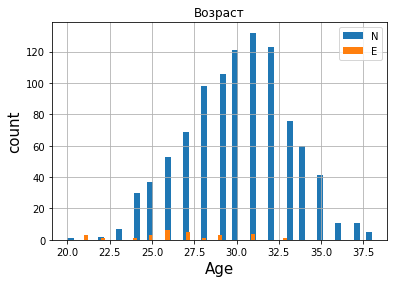

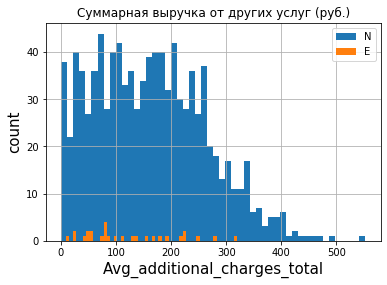

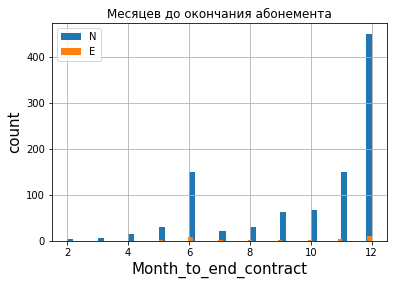

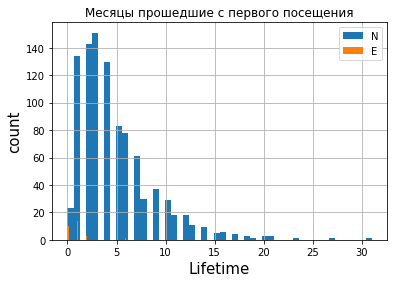

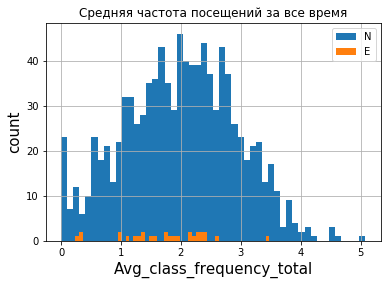

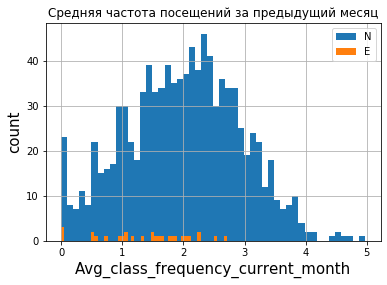

In [37]:
cluster(0)

cluster 1



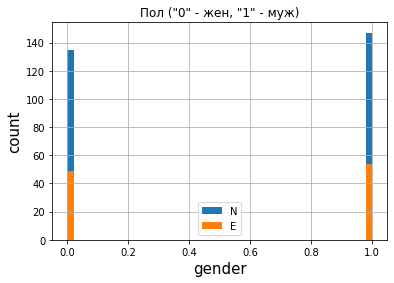

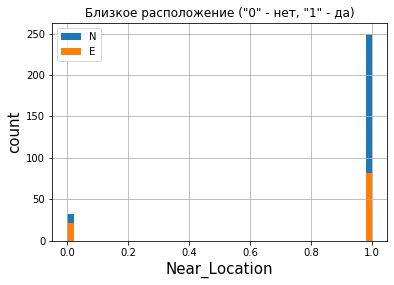

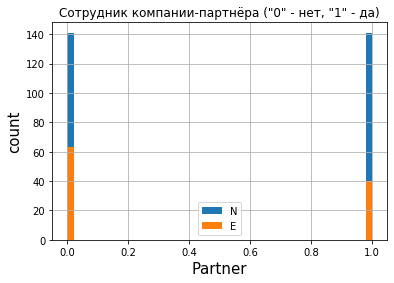

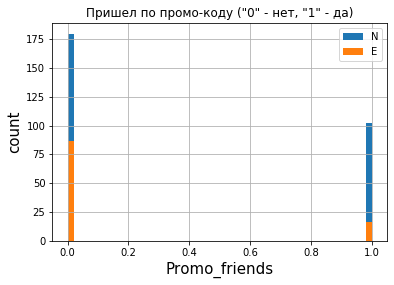

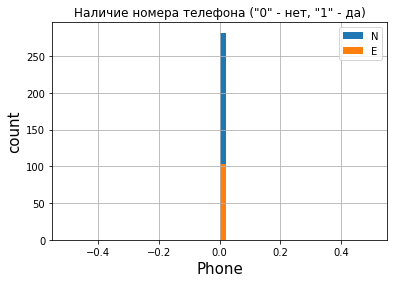

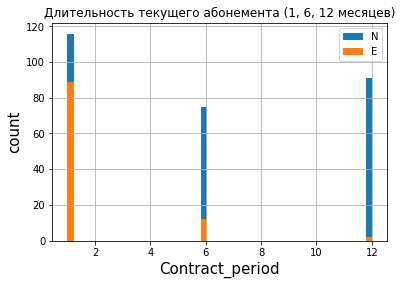

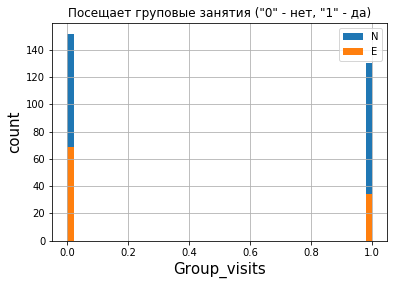

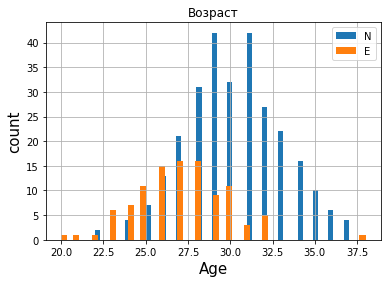

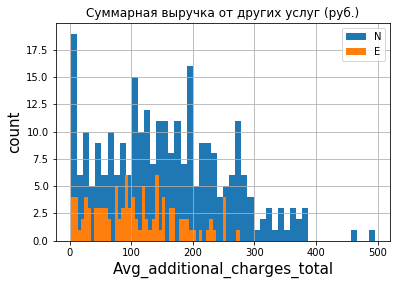

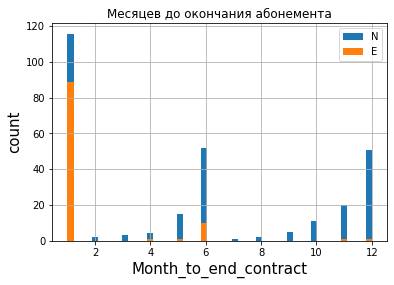

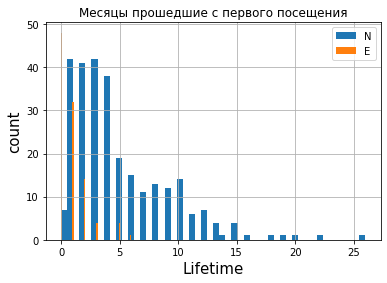

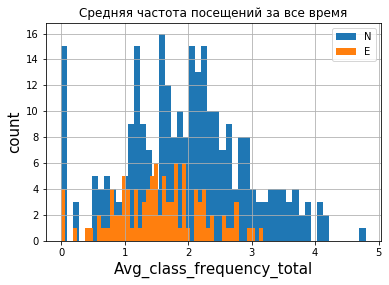

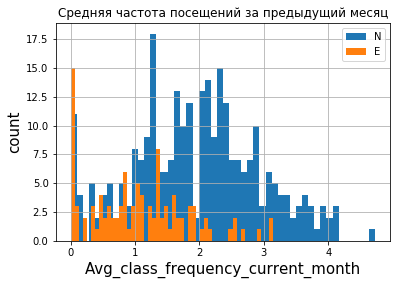

In [38]:
cluster(1)

cluster 2



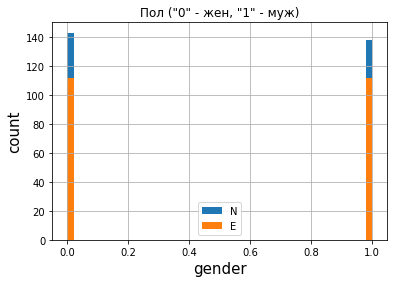

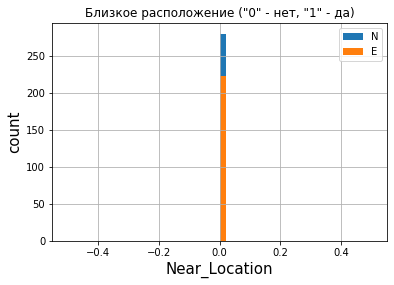

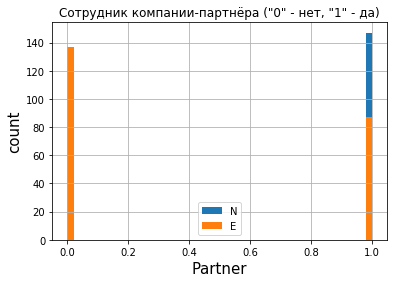

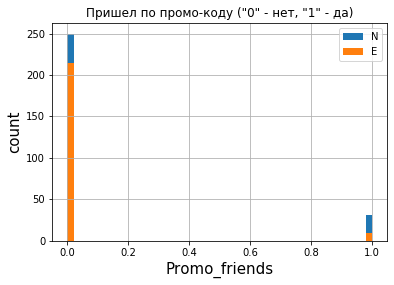

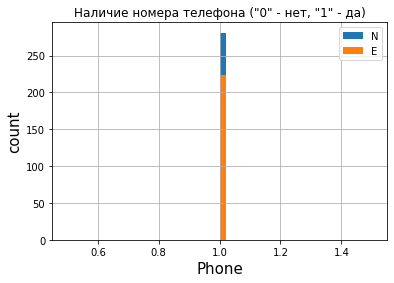

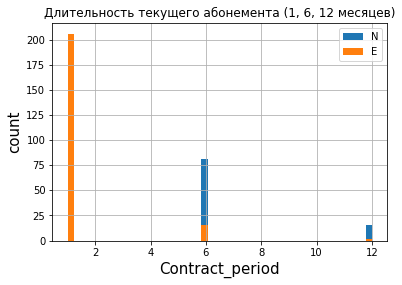

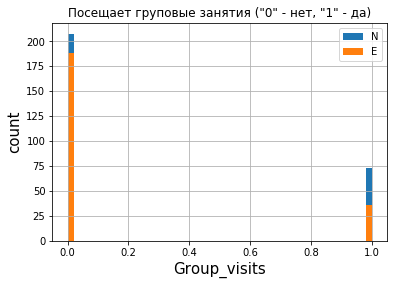

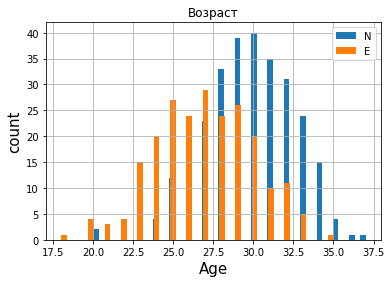

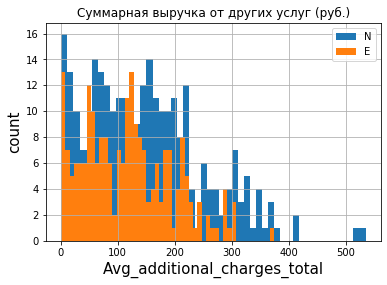

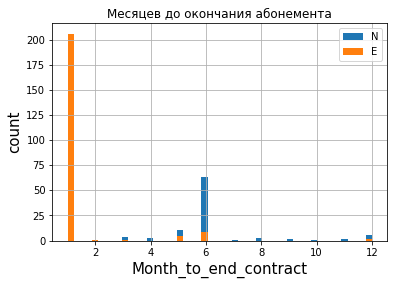

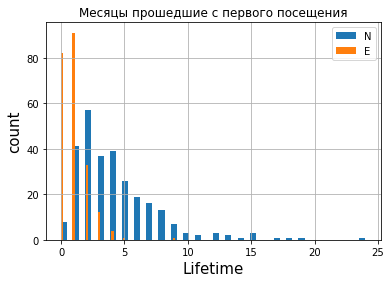

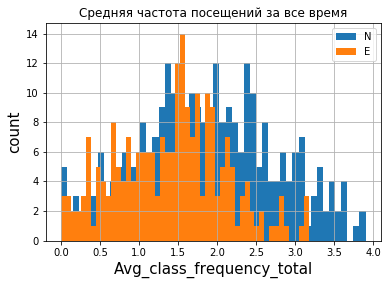

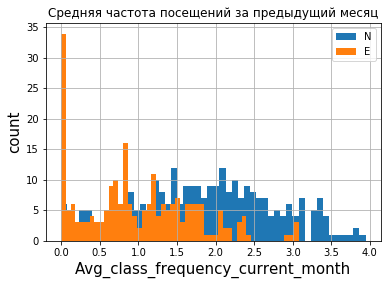

In [39]:
cluster(2)

cluster 3



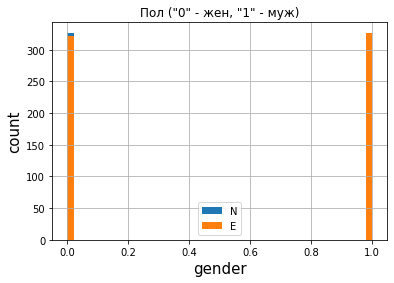

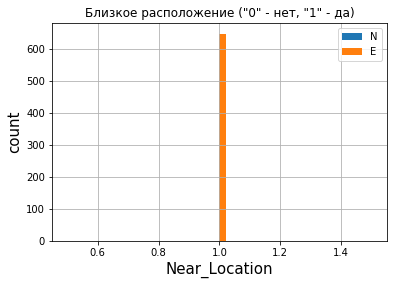

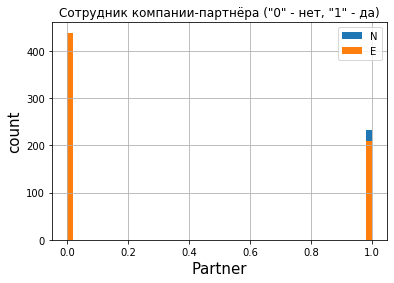

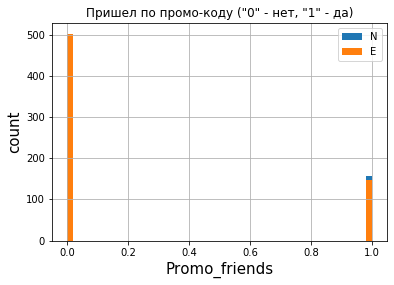

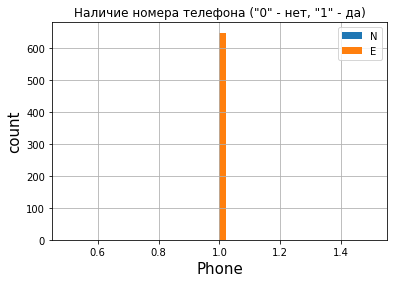

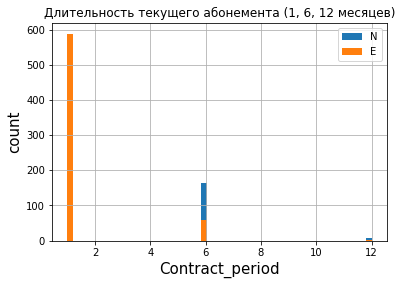

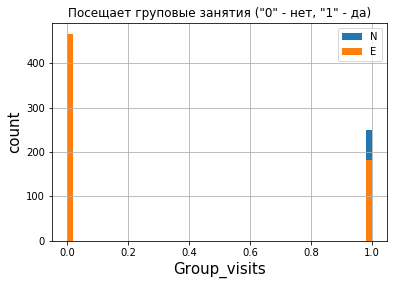

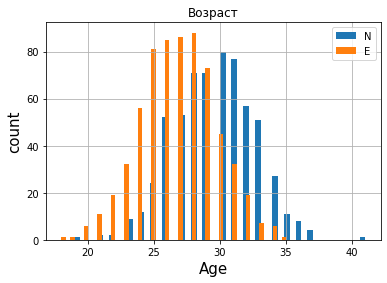

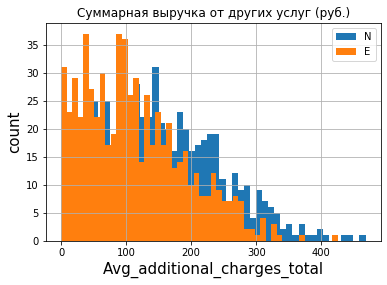

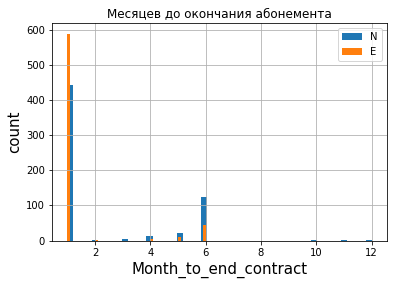

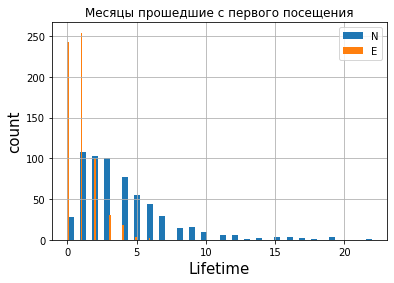

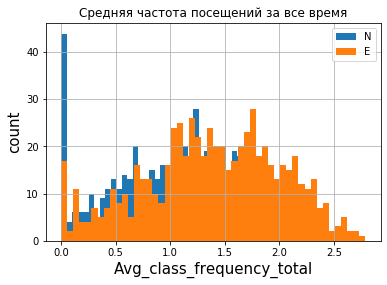

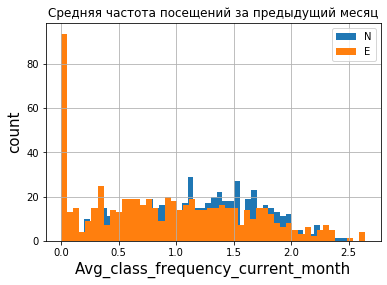

In [40]:
cluster(3)

cluster 4



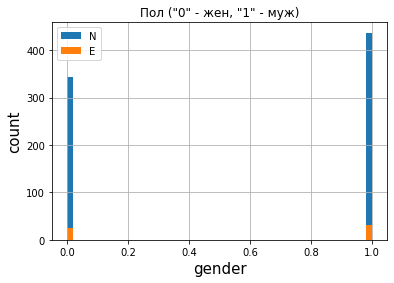

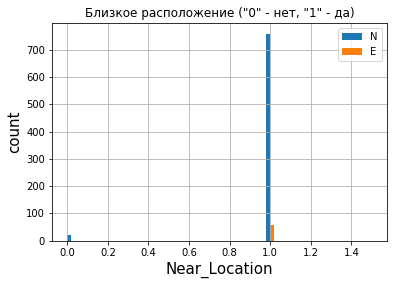

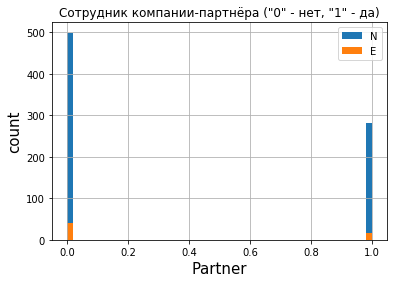

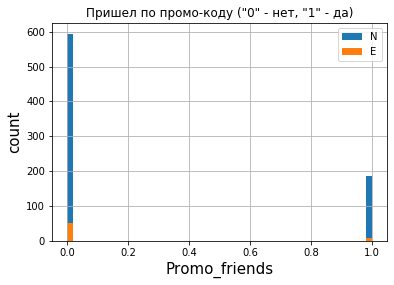

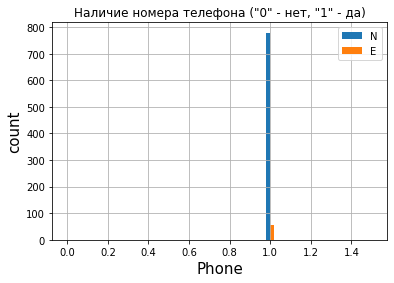

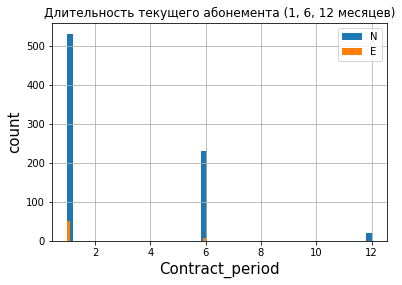

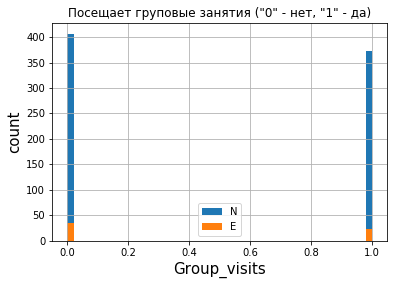

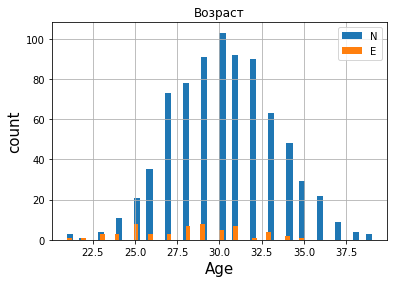

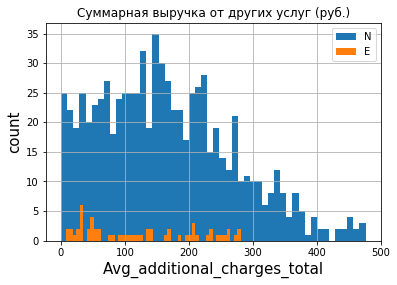

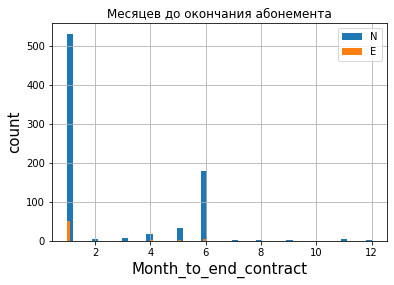

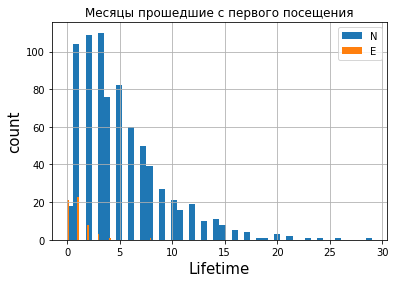

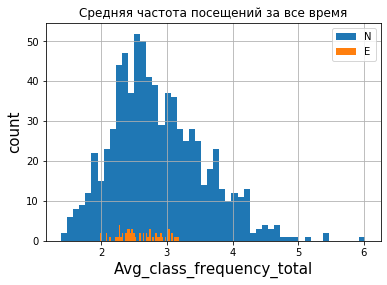

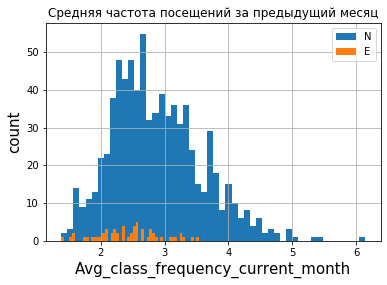

In [41]:
cluster(4)

Если рассматривать графики распределения признаков с учетом оттока, то 0 кластер, это клиенты очень редко попадающие в отток, а также этот кластер выделяется большим количеством месяцев у абонемента и до окончания тоже много месяце осталаось, а также сотрудников компаний-партнеров большинство. А 3 самый недисплинированный (в любви к спорту смысле))

#### - Для каждого полученного кластера посчитаем долю оттока.

In [42]:
Churn_sum = gym_churn.groupby('cluster')['Churn'].agg({'count', 'sum'}).reset_index()

In [43]:
Churn_sum

,cluster,sum,count
0,0,28,1011
1,1,103,385
2,2,224,505
3,3,649,1262
4,4,57,837


In [44]:
Churn_sum['share'] = Churn_sum['sum'] / Churn_sum['count'] * 100

In [45]:
Churn_sum

,cluster,sum,count,share
0,0,28,1011,2.769535
1,1,103,385,26.753247
2,2,224,505,44.356436
3,3,649,1262,51.426307
4,4,57,837,6.810036


Как и отмечалось выше 0 кластер самый надежный, а 3 больше всех склонен к оттоку.

#### Вывод:
-  Для кластеризация клиентов мы сначала стандартизировали данные, исключив целевую переменную, затем построили матрицу расстояний и нарисовали дендрограмму. Выяснили, число кластеров 4 — четыре разных цветов на графике. 
- Обучили модель кластеризации на основании алгоритма K-Means, разбив данные на пять кластеров
- По количеству клиентов в кластерах среднее значения возраста, выручки с доп.услуг одинаковое, также примерно одинаковое количество обеих полов в кластерах.В остальных признаках значения более изменчивы. Во втором кластере отсутствуют клиенты, которые живут или работают рядом, в первом - те клиенты, которые оставили свой номер тлф.
- Рассматривая, графики распределения признаков с учетам оттока, то 0 кластер, это клиенты очень редко попадающие в отток, а 3 самый не дисциплинированный. Рассчитав долю оттока для каждого кластера, подтвердилось, что 0 кластер самый надежный, а 3 больше всех склонен к оттоку.

[Наверх](#20-bullet)

<a id='7-bullet'></a>

## Общий вывод.

-  Имеется таблица с данными: "gym_churn" - таблица, размером в 4000 строк, типы данных соответствуют типам данных представленных в столбцах, пропусков и дубликатов не обнаружено.
- Изучив содержание таблицы, мы увидели, что среднестатистический клиент, это клиент без привязки к полу, потому что существенной разницы в количестве не выявлено,  тот который  живет или работает близко, пришел в клуб не по акции, не посещающий групповых занятий, ходит в среднем чуть меньше 2 раз в неделю, ему примерно 30 лет, 150 руб тратит в месяц на доп.услуги клуба, у него до конца абонемента месяц и первый раз он посетил клуб сети 3,7 месяцев назад.
- В отток  не попадают одинаково что мужчины, что женщины (почти разницы нет), те кто близко живет  или работает, сотрудники партнеров, те кто пришел по промо-коду, с абонементам большей длительности и кто посещает  групповые тренировки, а также более взрослые скорей не попадут в отток, чем попадут, также как и те, у которых еще много месяцев проплачено, "старые" клиенты и часто посещающие клуб.
- Далее посмотрели, увидели что у целевой переменной ('Churn') сильной корреляции нет ни с одним признаком, самое большое значение у времени с момента первого обращения в фитнес-центр
- Между собой коррелируются средние (за весь период и за последний месяц) посещения клуба в неделю, а также  длительность текущего действующего абонемента и количество месяцев до окончания абонемента.
- Построили модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце, т.е. сначала разбили данные на обучающую и валидационную выборку, стандартизировали и обучили модель на train-выборке двумя способами:  логистической регрессией и случайным лесом. 
- Оценили качество для обеих моделей на валидационной выборке метриками accuracy, precision и recall: увидели, что алгоритм логическая регрессия модели в метриках выглядит чуть выигрышнее, чем случайный лес, но обе модели показали очень хороший результат.
-  Для кластеризация клиентов мы сначала стандартизировали данные, исключив целевую переменную, затем построили матрицу расстояний и нарисовали дендрограмму. Выяснили, число кластеров 4 — четыре разных цветов на графике. 
- Обучили модель кластеризации на основании алгоритма K-Means, разбив данные на пять кластеров
- По количеству клиентов в кластерах среднее значения возраста, выручки с доп.услуг одинаковое, также примерно одинаковое количество обоих полов в кластерах.В остальных признаках значения более изменчивы. Во втором кластере отсутствуют клиенты, которые живут или работают рядом, в первом - те клиенты, которые оставили свой номер тлф.
- Рассматривая, графики распределения признаков с учетам оттока, то нулевой кластер, это клиенты очень редко попадающие в отток, а третий самый не дисциплинированный. Рассчитав долю оттока для каждого кластера, подтвердилось, что 0 кластер самый надежный, а 3 больше всех склонен к оттоку.
- Рекомендации для стратегии взаимодействия с клиентами и их удержания:
  - Клиентам, которые теоретически могут попасть в отток, предложить особые условия (например скидки на индивидуальные занятия)
  - Для клиентов желающих купить абонемент на месяц, предложить более интересное предложение, но на 6 месяцев, или например, хорошую скидку на индивидуальные занятия или на дополнительные услуги сети или на сам абонемент, если купит абонемент больше, чем на 1 месяц.
  - Предлагать скидки при условии, что абонемент куплен еще при действующем абонементе и на более длительный срок (не меньше, чем был), но не меньше шести месяцев.
  - Обзвон клиентов, которые попали в отток, предложить им отдельные условия, например продлить абонемент на время которое они отсутствовали.
  - Найти дополнительные выход на организации близкорасположенные  к клубам сети, которые могли бы стать компаниями-партнерами.